# Template Generation

# Import libraries and files

In [1]:
#import libraries and files
import pandas as pd
import operator
import cv2
import csv
import math
import matplotlib.pyplot as plt  # standard Python plotting library
import numpy as np  # package for scientific computing, handles arrays and math
import matplotlib.gridspec as gs
from scipy.optimize import curve_fit
import seaborn as sns
from tdt import read_block

#photometry path and file
FOLDER_PATH = '/home/li/Documents/Template_matching/Photometry/'

#Using photometry sessions from 9 different mice
FOLDER_NAME = []
FOLDER_NAME.append('159459-R-221006-091824')
FOLDER_NAME.append('159459-L-221020-102241')
FOLDER_NAME.append('159459-BL-221018-091752')
FOLDER_NAME.append('151653-R-221005-112408')
FOLDER_NAME.append('151653-L-221019-114353')
FOLDER_NAME.append('151653-RR-221012-102704')
FOLDER_NAME.append('151652-L-221011-091017')
FOLDER_NAME.append('151652-RR-221018-121215')
FOLDER_NAME.append('151653-LL-221101-100649')
tpath=len(FOLDER_NAME)

print("FOLDER_NAME: ", FOLDER_NAME)
BLOCK_PATH = []
for i in range(tpath):
    BLOCK_PATH.append(FOLDER_PATH + FOLDER_NAME[i])
#end for i

#Path to videos
VIDEO_PATH = []
VIDEO_PATH.append(BLOCK_PATH[0]+'/'+'Li_photo_stim_1_camera_-220601-092827_159459-R-221006-091824_Cam1.avi')
VIDEO_PATH.append(BLOCK_PATH[1]+'/'+'Li_photo_stim_1_camera_-220601-092827_159459-L-221020-102241_Cam1.avi')
VIDEO_PATH.append(BLOCK_PATH[2]+'/'+'Li_photo_stim_1_camera_-220601-092827_159459-BL-221018-091752_Cam1.avi')
VIDEO_PATH.append(BLOCK_PATH[3]+'/'+'Li_photo_stim_1_camera_-220601-092827_151653-R-221005-112408_Cam1.avi')
VIDEO_PATH.append(BLOCK_PATH[4]+'/'+'Li_photo_stim_1_camera_-220601-092827_151653-L-221019-114353_Cam1.avi')
VIDEO_PATH.append(BLOCK_PATH[5]+'/'+'Li_photo_stim_1_camera_-220601-092827_151653-RR-221012-102704_Cam1.avi')
VIDEO_PATH.append(BLOCK_PATH[6]+'/'+'Li_photo_stim_1_camera_-220601-092827_151652-L-221011-091017_Cam1.avi')
VIDEO_PATH.append(BLOCK_PATH[7]+'/'+'Li_photo_stim_1_camera_-220601-092827_151652-RR-221018-121215_Cam1.avi')
VIDEO_PATH.append(BLOCK_PATH[8]+'/'+'Li_photo_stim_1_camera_-220601-092827_151653-LL-221101-100649_Cam1.avi')

#Behavior Deeplabcut file
BEHAVE_PATH = '/home/li/Documents/Template_matching/DLC/'
BEHAVE_NAME = []
BEHAVE_NAME.append('Li_photo_stim_1_camera_-220601-092827_159459-R-221006-091824_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv')
BEHAVE_NAME.append('Li_photo_stim_1_camera_-220601-092827_159459-L-221020-102241_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv')
BEHAVE_NAME.append('Li_photo_stim_1_camera_-220601-092827_159459-BL-221018-091752_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv')
BEHAVE_NAME.append('Li_photo_stim_1_camera_-220601-092827_151653-R-221005-112408_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv')
BEHAVE_NAME.append('Li_photo_stim_1_camera_-220601-092827_151653-L-221019-114353_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv')
BEHAVE_NAME.append('Li_photo_stim_1_camera_-220601-092827_151653-RR-221012-102704_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv')
BEHAVE_NAME.append('Li_photo_stim_1_camera_-220601-092827_151652-L-221011-091017_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv')
BEHAVE_NAME.append('Li_photo_stim_1_camera_-220601-092827_151652-RR-221018-121215_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv')
BEHAVE_NAME.append('Li_photo_stim_1_camera_-220601-092827_151653-LL-221101-100649_Cam1DLC_resnet50_Anesthesia_simplified_2Apr4shuffle1_300000.csv')

print("\033[1m", tpath, " Experiments: "+"\033[0m")
for i in range(tpath):
    print(i+1,".", FOLDER_NAME[i])
print("Done")


FOLDER_NAME:  ['159459-R-221006-091824', '159459-L-221020-102241', '159459-BL-221018-091752', '151653-R-221005-112408', '151653-L-221019-114353', '151653-RR-221012-102704', '151652-L-221011-091017', '151652-RR-221018-121215', '151653-LL-221101-100649']
 9  Experiments: 
1 . 159459-R-221006-091824
2 . 159459-L-221020-102241
3 . 159459-BL-221018-091752
4 . 151653-R-221005-112408
5 . 151653-L-221019-114353
6 . 151653-RR-221012-102704
7 . 151652-L-221011-091017
8 . 151652-RR-221018-121215
9 . 151653-LL-221101-100649
Done


# Photometry

 # 1  Name:  159459-R-221006-091824 
read from t=0s to t=3060.98s
470A/405A sampling frequency:  1017.25
Total time:  3060.92
y =  0.88 *x +  26.17
Removing outlier...
Number of outliers changed to NaN:  0
Mean:  -0.194  +/- Std: 0.243
Image:  640  x  480  at  10.0 frames/s x  30613.0  frames
Total time:  3060.92 Frame interval:  0.1
 # 2  Name:  159459-L-221020-102241 
read from t=0s to t=3182.84s
470A/405A sampling frequency:  1017.25
Total time:  3182.85
y =  1.2 *x +  -37.03
Removing outlier...
Number of outliers changed to NaN:  212
Mean:  -0.694  +/- Std: 1.396
Image:  640  x  480  at  10.0 frames/s x  27520.0  frames
Total time:  3182.85 Frame interval:  0.12
 # 3  Name:  159459-BL-221018-091752 
read from t=0s to t=3246.08s
470A/405A sampling frequency:  1017.25
Total time:  3246.01
y =  0.95 *x +  8.59
Removing outlier...
Number of outliers changed to NaN:  0
Mean:  -0.699  +/- Std: 0.826
Image:  640  x  480  at  10.0 frames/s x  32465.0  frames
Total time:  3246.01 Frame inte

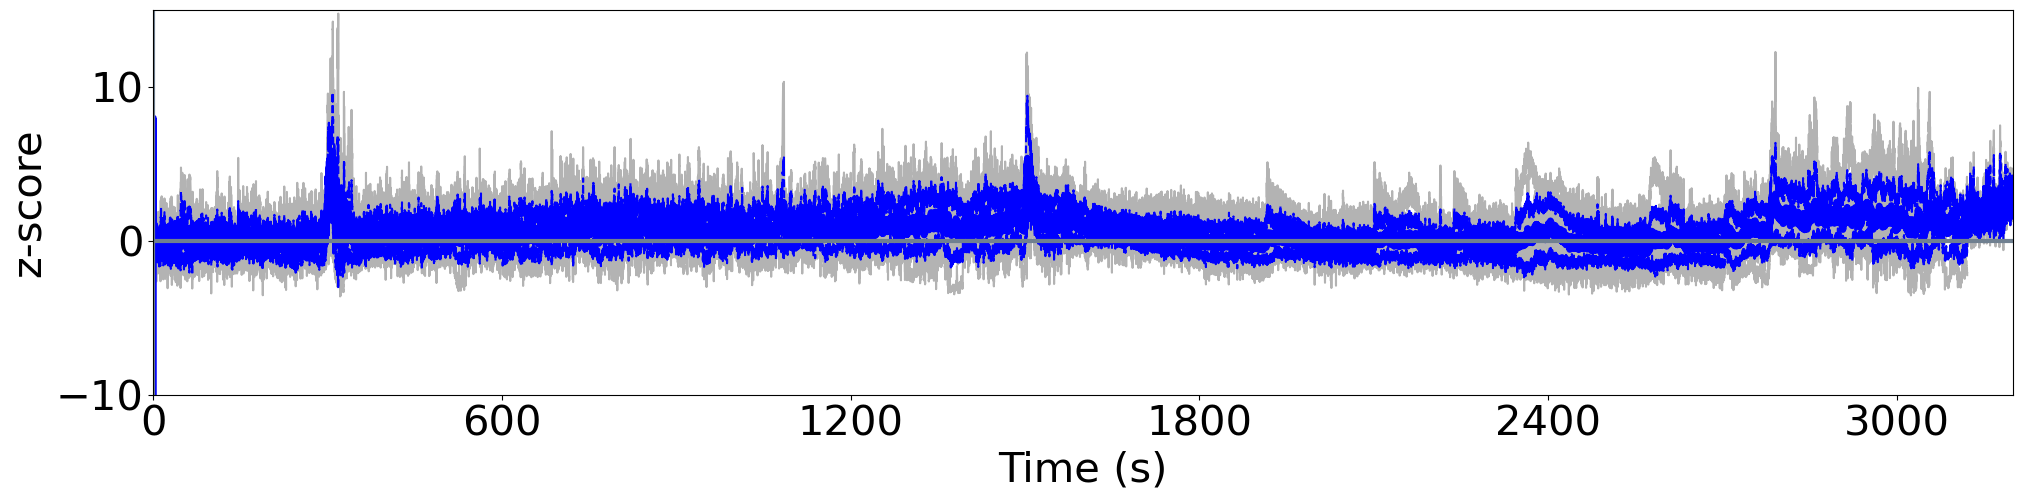

In [2]:
#Photometry z-score normalization for analysis

base_start = [60,60,60,60,60,60,60,60,60] #baseline start
base_end = [300,300,300,300,300,300,300,300,300] #baseline end
femerge = [0 for i in range(tpath)]
femerge = [27902,29400,27842,28500,28511,27855,27314,27371,27935] #RORR end
dF_F_outlier = 100 #dF_F outlier removal threshold
aligned_data = [0 for i in (range(tpath+1))]

for j in range(tpath):
    cpath = j # current path
    print("\033[1m","#", j+1, " Name: ", FOLDER_NAME[cpath],"\033[0m")
    data = read_block(BLOCK_PATH[cpath])
    
    #sample size and frequency
    data_470 = data.streams._470A.data
    data_405 = data.streams._405A.data
    size_470A = len(data_470)
    size_405A = len(data_405) #isosbestic channel
    freq_470A = data.streams._470A.fs #sampling frequency
    print("470A/405A sampling frequency: ", np.round(freq_470A,2))
    time_470A = np.linspace(1, size_470A, size_470A) / freq_470A
    time_405A = np.linspace(1, size_405A, size_405A) / freq_470A
    total_time = time_470A[size_470A-1]
    print("Total time: ", np.round(total_time,2))
    fit_window = size_470A
    avg_window = 180
    
    #Fit 405 nm trace to 470 nm by applying least-squares fit
    #Linear least square fit
    Sum_f = 0 #f is 405A
    Sum_g = 0 #g is 470A
    Sum_fg = 0 # fg is 405A*407A
    Sum_fsq = 0 #fsq is f^2 or 405A^2
    for i in range(fit_window):
        Sum_f = Sum_f + data_405[i]
        Sum_g = Sum_g + data_470[i]
        Sum_fg = Sum_fg + data_405[i]*data_470[i]
        Sum_fsq = Sum_fsq + (data_405[i])*(data_405[i])

    #Slope*x + Intercept = y
    Slope = (Sum_f*Sum_g - size_470A*Sum_fg)/(Sum_f*Sum_f - size_470A*Sum_fsq)
    Intercept = (Sum_g*Sum_fsq - Sum_f*Sum_fg)/(size_470A*Sum_fsq - Sum_f*Sum_f)
    print("y = ", np.round(Slope,2), "*x + ", np.round(Intercept,2))

    Fit_405A = [0 for i in range(size_470A)]
    dF_F = [0 for i in range(size_470A)]
    for i in range(size_470A):
        Fit_405A[i] = Slope*data_405[i] + Intercept
        dF_F[i] = (data_470[i] - Fit_405A[i])*100/Fit_405A[i]

    #Outlier removal
    print("Removing outlier...")
    count = 0
    for i in range(size_470A):
        if abs(dF_F[i])>dF_F_outlier:
            dF_F[i] = np.NaN
            count = count + 1
        #endif
    #end for i
    print("Number of outliers changed to NaN: ", count)       
        
    avg_F = np.nanmean(dF_F[int(base_start[j]*freq_470A):int(base_end[j]*freq_470A)])
    std_F = np.nanstd(dF_F[int(base_start[j]*freq_470A):int(base_end[j]*freq_470A)])
    print("Mean: ", np.round(avg_F,3), " +/- Std:", np.round(std_F,3))

    for i in range(size_470A):
        dF_F[i] = (dF_F[i] - avg_F)/std_F

    if j==0:
        max_size = len(time_470A)
        aligned_data[0] = time_470A
    elif (len(time_470A)>max_size):
        max_size = len(time_470A)
        aligned_data[0] = time_470A
    aligned_data[j+1]=dF_F
    
        
    #Video Montage
    cap = cv2.VideoCapture(VIDEO_PATH[j])
    fwidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    fheight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frate = cap.get(cv2.CAP_PROP_FPS)
    tframes = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    int_frame = size_470A/freq_470A/(tframes-1) #averaged seconds between frames
    print("Image: ", fwidth, " x ", fheight, " at ",frate, "frames/s x ", tframes, " frames")
    print("Total time: ", np.round(size_470A/freq_470A,2), "Frame interval: ", np.round(int_frame,2))
    cap.release()
    cv2.destroyAllWindows()
    #forward_window = 3000
    
    #endif
#end j for loop    

for j in range(tpath):
    temp = [np.NaN]*max_size
    for i in range(len(aligned_data[j+1])):
        temp[i] = aligned_data[j+1][i]
    #endfor i
    aligned_data[j+1] = temp
#endfor j

all_signals = np.vstack((aligned_data[1],aligned_data[2],aligned_data[3], aligned_data[4], aligned_data[5], aligned_data[6], aligned_data[7], aligned_data[8], aligned_data[9]))

#end j for loop
mean_signal = np.nanmean(all_signals,axis=0)
std_signal = np.nanstd(all_signals,axis=0)


font_size = 30
plot_width = 24
plot_height = 5

fig,(ax5) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
for j in range(tpath+1):
    if j>0:
        ax5.plot(aligned_data[0], aligned_data[j], color=(.7,.7,.7))
#end j for loop
ax5.plot(aligned_data[0],mean_signal, color='b', linewidth=5)
ax5.plot(aligned_data[0], mean_signal + std_signal, 'b--', aligned_data[0], mean_signal - std_signal, 'b--')
ax5.axvline(0, color='slategray', linewidth=3)
ax5.axhline(0, color='slategray', linewidth=3)
ax5.set_ylabel('z-score', fontsize=font_size)
ax5.set_xlabel('Time (s)', fontsize=font_size)
ax5.tick_params(axis="x", labelsize=font_size)
ax5.tick_params(axis="y", labelsize=font_size)
ax5.set_ylim(-10,15)
ax5.set_xlim(0, 3200)
plt.xticks(np.arange(0, 3200, 600))
plt.show()



# Behavior

# 1 
Image:  640  x  480  at  10.0 frames/s x  30613.0  frames
Importing pose coordinates...
['bodyparts', 'Nose', 'Nose', 'Nose', 'LeftEar', 'LeftEar', 'LeftEar', 'RightEar', 'RightEar', 'RightEar', 'TailBase', 'TailBase', 'TailBase']
Calculating pixel displacement...
Done.
# 2 
Image:  640  x  480  at  10.0 frames/s x  27520.0  frames
Importing pose coordinates...
['bodyparts', 'Nose', 'Nose', 'Nose', 'LeftEar', 'LeftEar', 'LeftEar', 'RightEar', 'RightEar', 'RightEar', 'TailBase', 'TailBase', 'TailBase']
Calculating pixel displacement...
Done.
# 3 
Image:  640  x  480  at  10.0 frames/s x  32465.0  frames
Importing pose coordinates...
['bodyparts', 'Nose', 'Nose', 'Nose', 'LeftEar', 'LeftEar', 'LeftEar', 'RightEar', 'RightEar', 'RightEar', 'TailBase', 'TailBase', 'TailBase']
Calculating pixel displacement...
Done.
# 4 
Image:  640  x  480  at  10.0 frames/s x  30615.0  frames
Importing pose coordinates...
['bodyparts', 'Nose', 'Nose', 'Nose', 'LeftEar', 'LeftEar', 'LeftEar', 'RightEa

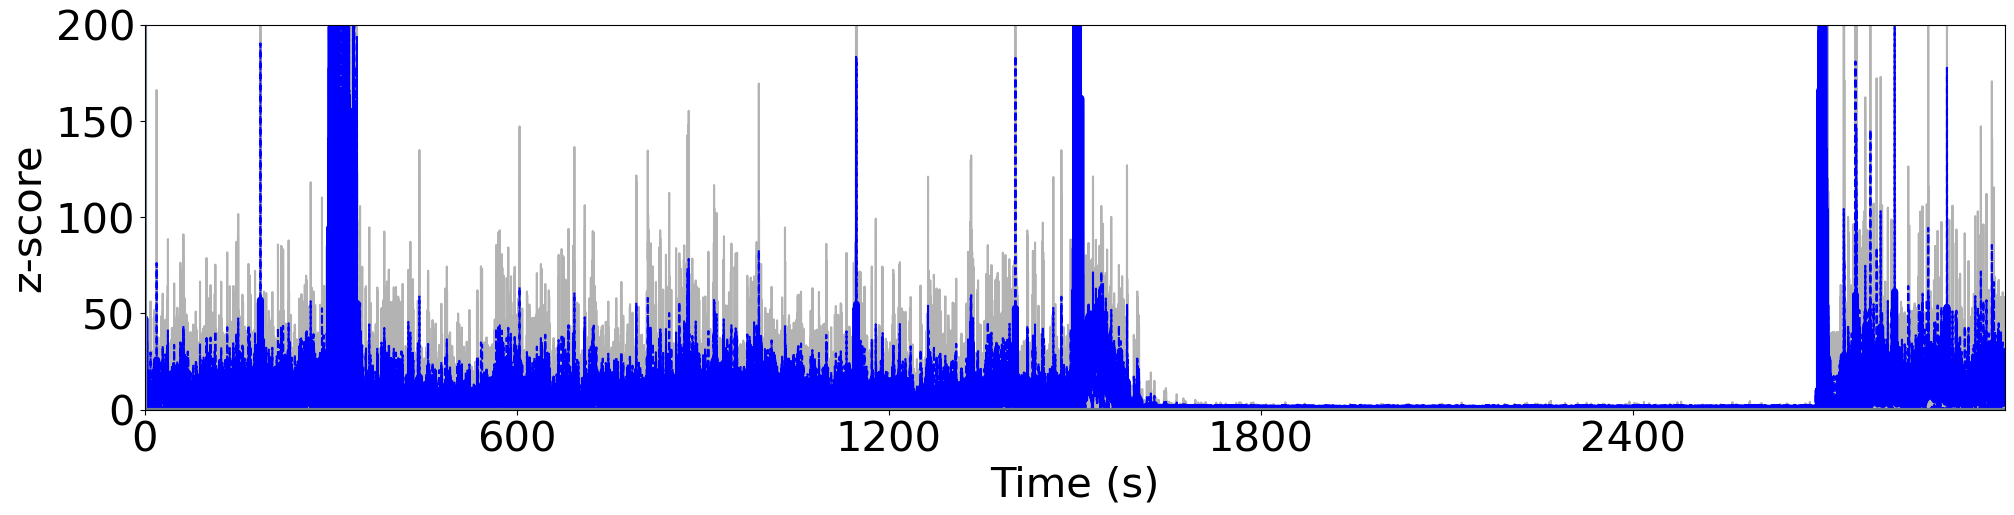

In [3]:
behave_data= [0 for i in (range(tpath+1))]

#Behavior video analysis
for j in range(tpath):
    print("\033[1m"+"#",j+1,"\033[0m")
    print("Collecting video infomration")
    #Video information
    cap = cv2.VideoCapture(VIDEO_PATH[j])
    fwidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    fheight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frate = cap.get(cv2.CAP_PROP_FPS)
    tframes = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    print("Image: ", fwidth, " x ", fheight, " at ",frate, "frames/s x ", tframes, " frames")
    cap.release()
    cv2.destroyAllWindows()

    #Collect pose coordinates from Deeplabcut csv file
    print("Importing pose coordinates...")
    #initialize lists
    behave_time=[]
    nose_xcoord=[]
    nose_ycoord=[]
    leftEar_xcoord=[]
    leftEar_ycoord=[]
    rightEar_xcoord=[]
    rightEar_ycoord=[]
    tailBase_xcoord=[]
    tailBase_ycoord=[]

    with open(BEHAVE_PATH+BEHAVE_NAME[j]) as behave_file:
        reader = csv.reader(behave_file)
        i=0       
        for row in reader:
            if i==1:
                print(row) #print coordinates headers
            if i>2:
                behave_time.append(np.round(int(row[0])/frate,2))
                nose_xcoord.append(np.round(float(row[1]),1))
                nose_ycoord.append(np.round(float(row[2]),1))
                leftEar_xcoord.append(np.round(float(row[4]),1))
                leftEar_ycoord.append(np.round(float(row[5]),1))
                rightEar_xcoord.append(np.round(float(row[7]),1))
                rightEar_ycoord.append(np.round(float(row[8]),1))
                tailBase_xcoord.append(np.round(float(row[10]),1))
                tailBase_ycoord.append(np.round(float(row[11]),1))
            #endif
            i=i+1
        #endfor
    behave_file.close()

    #Calculate frame by frame coordinate displacement 
    print("Calculating pixel displacement...")
    #initialize variables
    nose_dist = [0]
    tailBase_dist = [0]
    for i in range(len(behave_time)):
        if i>0:
            nose_dist.append(np.round(math.sqrt((nose_xcoord[i]-nose_xcoord[i-1])**2 + (nose_ycoord[i]-nose_ycoord[i-1])**2),2))
            tailBase_dist.append(np.round(math.sqrt((tailBase_xcoord[i]-tailBase_xcoord[i-1])**2 + (tailBase_ycoord[i]-tailBase_ycoord[i-1])**2),2))
        #endif
    #end for i
    
    if j==0:
        behave_data[0]= behave_time
    #endif
    behave_data[j+1]=[nose_dist[x]+tailBase_dist[x] for x in range(len(behave_time))]
    print("Done.")
#endfor j

max_size = len(behave_data[0])
for j in range(tpath):
    if(len(behave_data[j+1])>max_size):
        max_size=len(behave_data[j+1])
    #endif
#endfor j

for j in range(tpath+1):
    temp = [np.NaN]*max_size
    for i in range(len(behave_data[j])):
        temp[i] = behave_data[j][i]
    #endfor i
    behave_data[j]= temp
#endfor j

all_behave_signals = np.vstack((behave_data[1],behave_data[2],behave_data[3], behave_data[4], behave_data[5], behave_data[6], behave_data[7], behave_data[8], behave_data[9]))

#end j for loop
mean_signal = np.nanmean(all_behave_signals,axis=0)
std_signal = np.nanstd(all_behave_signals,axis=0)


font_size = 30
plot_width = 24
plot_height = 5

fig,(ax5) = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
for j in range(tpath+1):
    if j>0:
        ax5.plot(behave_data[0], behave_data[j], color=(.7,.7,.7))
#end j for loop
ax5.plot(behave_data[0],mean_signal, color='b', linewidth=5)
ax5.plot(behave_data[0], mean_signal + std_signal, 'b--', behave_data[0], mean_signal - std_signal, 'b--')
ax5.axvline(0, color='slategray', linewidth=3)
ax5.axhline(0, color='slategray', linewidth=3)
ax5.set_ylabel('z-score', fontsize=font_size)
ax5.set_xlabel('Time (s)', fontsize=font_size)
ax5.tick_params(axis="x", labelsize=font_size)
ax5.tick_params(axis="y", labelsize=font_size)
ax5.set_ylim(0,200)
ax5.set_xlim(0, 3000)
plt.xticks(np.arange(0, 3000, 600))
plt.show()




# Behavioral Transition Events

In [4]:
#Behavior event transitions
#The two variables for determining movement pause determines sensitivity: pause_interval, pause_threshold

behave_mean_marker1_array = []
behave_mean_marker2_array = []
behave_mean2_marker1_array = []
behave_mean2_marker2_array = []

activity_mean_array = []
activity_mean2_array = []

for k in range(tpath):
    print("\033[1m"+"#",k+1,"\033[0m")
    print("Collecting video infomration")
    #Video information
    cap = cv2.VideoCapture(VIDEO_PATH[k])
    fwidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    fheight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frate = cap.get(cv2.CAP_PROP_FPS)
    tframes = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    print("Image: ", fwidth, " x ", fheight, " at ",frate, "frames/s x ", tframes, " frames")
    cap.release()
    cv2.destroyAllWindows()

    #Collect pose coordinates from Deeplabcut csv file
    print("Importing pose coordinates...")
    #initialize lists
    behave_time=[]
    nose_xcoord=[]
    nose_ycoord=[]
    leftEar_xcoord=[]
    leftEar_ycoord=[]
    rightEar_xcoord=[]
    rightEar_ycoord=[]
    tailBase_xcoord=[]
    tailBase_ycoord=[]

    with open(BEHAVE_PATH+BEHAVE_NAME[k]) as behave_file:
        reader = csv.reader(behave_file)
        i=0       
        for row in reader:
            if i==1:
                print(row) #print coordinates headers
            if i>2:
                behave_time.append(np.round(int(row[0])/frate,2))
                nose_xcoord.append(np.round(float(row[1]),1))
                nose_ycoord.append(np.round(float(row[2]),1))
                leftEar_xcoord.append(np.round(float(row[4]),1))
                leftEar_ycoord.append(np.round(float(row[5]),1))
                rightEar_xcoord.append(np.round(float(row[7]),1))
                rightEar_ycoord.append(np.round(float(row[8]),1))
                tailBase_xcoord.append(np.round(float(row[10]),1))
                tailBase_ycoord.append(np.round(float(row[11]),1))
            #endif
            i=i+1
        #endfor
    behave_file.close()

    #Calculate frame by frame coordinate displacement 
    print("Calculating pixel displacement...")
    #initialize variables
    nose_dist = [0]
    tailBase_dist = [0]
    for i in range(len(behave_time)):
        if i>0:
            nose_dist.append(np.round(math.sqrt((nose_xcoord[i]-nose_xcoord[i-1])**2 + (nose_ycoord[i]-nose_ycoord[i-1])**2),2))
            tailBase_dist.append(np.round(math.sqrt((tailBase_xcoord[i]-tailBase_xcoord[i-1])**2 + (tailBase_ycoord[i]-tailBase_ycoord[i-1])**2),2))
        #endif
    #end for i
    
    if k==0:
        behave_data[0]= behave_time
    #endif
    behave_data[k+1]=[nose_dist[x]+tailBase_dist[x] for x in range(len(behave_time))]
    
    #TRANSITION
    print("Behavioral event detection: arrest to movement")
    #User defined parameters
    intervals=['pre','drug','ISO','emerge','post'] #Breaking into different treatment windows
    print("Total behave time: ", behave_time[-1])
    total_time = behave_time[-1]
    interval_cutoff = [0,300,1500,2700,femerge[k]/10,int(behave_time[-1])]
    #emergence_start = femerge[k]/10
    marker_dist = [nose_dist, tailBase_dist]
    pre_window_size = 5 # in second
    post_window_size = 10 # in second
    pause_interval = 1 #in second
    pause_threshold = 10 #pixel

    #Initialize matrices and lists
    category_size=len(intervals)
    #behavior marker # defined by marker_dist, manual addition if need more
    behave_data_marker1 = [[] for i in range(category_size)]
    behave_data_marker2 = [[] for i in range(category_size)]
    behave_data2_marker1 = [[] for i in range(category_size)]
    behave_data2_marker2 = [[] for i in range(category_size)]
    activity_data = [[] for i in range(category_size)]
    activity_data2 = [[] for i in range(category_size)]
    event_count = [0 for i in range(category_size)]
    event_count2 = [0 for i in range(category_size)]
    behave_interval_time = []
    behave_interval_time2 = []
    activity_interval_time = []
    activity_interval_time2 = []
#    behave_mean=[np.NaN for i in range(category_size)]
    behave_std=[np.NaN for i in range(category_size)]
#    behave_mean2=[np.NaN for i in range(category_size)]
    behave_std2=[np.NaN for i in range(category_size)]
    print("Behave_data: ", len(behave_data_marker1))
    dF_F = aligned_data[k+1]
    
    #re-align time
    print("Re-aligning event times...")
    #define time intervals in behavioral and photometry data
    behave_interval_time.append(behave_time[0:int((pre_window_size+post_window_size)*frate)]) #behave_time
    activity_interval=int((pre_window_size+post_window_size)*freq_470A) #calculate activity interval
    activity_interval_time.append(time_470A[0:activity_interval]) #activity_time
    behave_interval_time2.append(behave_time[0:int((pre_window_size+post_window_size)*frate)])
    activity_interval=int((pre_window_size+post_window_size)*freq_470A)
    activity_interval_time2.append(time_470A[0:activity_interval])

    behave_mean=[]
    behave_mean2=[]
    behave_interval_time[0] = [i - pre_window_size for i in behave_interval_time[0]] #re-align to 0
    activity_interval_time[0] = [i - pre_window_size for i in activity_interval_time[0]] #realign to 0
    behave_interval_time2[0] = [i - pre_window_size for i in behave_interval_time2[0]]
    activity_interval_time2[0] = [i - pre_window_size for i in activity_interval_time2[0]]
    print("Done.")

    print("Finding behavioral events...")
    count = 0
    #movement_bin = []
    initiate=0
    for i in range(int(total_time*frate)+1):
        if(i>pre_window_size*frate and i<int((int(total_time)-post_window_size)*frate) and int(i+post_window_size*frate)<len(marker_dist[0])):
            for m in range(len(interval_cutoff)-1):
                if(i>=(interval_cutoff[m]*frate) and i<(interval_cutoff[m+1]*frate)):
                    break;
                #endfor i
            #endfor m            
            #if not moving
            if(marker_dist[0][i]<pause_threshold and marker_dist[1][i]<pause_threshold):
            #no prior moving
                if(initiate==0):
                    count = count+1
                    #movement_bin.append(0)
                #if prior moving
                else:
                    #if moving duration met, count as move to arrest
                    if(np.amax(marker_dist[0][i:int(i+frate*pause_interval)])<pause_threshold and np.amax(marker_dist[1][i:int(i+frate*pause_interval)])<pause_threshold):
                        #event2_times.append(behave_time[i])
                        behave_data2_marker1[m].append(marker_dist[0][int(i-pre_window_size*frate):int(i+post_window_size*frate)])
                        behave_data2_marker2[m].append(marker_dist[1][int(i-pre_window_size*frate):int(i+post_window_size*frate)])
                        activity_data2[m].append(np.round(dF_F[int((i/frate-pre_window_size)*freq_470A):(int((i/frate-pre_window_size)*freq_470A)+activity_interval)],2))
                        initiate=0
                        count=0
                        #movement_bin.append(0)
                    #if moving duration not met, continue as moving
                    else:
                        count=count+1
                        #movement_bin.append(10)
            #if moving            
            else:
                #if prior not moving
                if(initiate==0):
                    #if not moving duration met, count as arrest to move
                    if(count>=(frate*pause_interval)):
                        #event_times.append(behave_time[i])
                        behave_data_marker1[m].append(marker_dist[0][int(i-pre_window_size*frate):int(i+post_window_size*frate)])
                        behave_data_marker2[m].append(marker_dist[1][int(i-pre_window_size*frate):int(i+post_window_size*frate)])
                        activity_data[m].append(np.round(dF_F[int((i/frate-pre_window_size)*freq_470A):(int((i/frate-pre_window_size)*freq_470A)+activity_interval)],2))
                        initiate=1
                        count=0
                        #movement_bin.append(10)
                    #if moving duration not met, back to 0
                    else:
                        count=0
                        #movement_bin.append(0)
                #if prior moving, continue to count as moving
                #else:
                    #movement_bin.append(10)
            #endif
        #else:
            #movement_bin.append(0)
    #endfor i
    print("Done.")

    #activity baseline change to 0
    print("Normalize pre-event window to 0...")
    for j in range(len(activity_data)):
        if(len(activity_data[j])!=0):
            event_count[j]=len(activity_data[j])
            for i in range(len(activity_data[j])):
                baseline_median = np.median(activity_data[j][i][0:int(pre_window_size*freq_470A)-1])
                activity_data[j][i] = [i-baseline_median for i in activity_data[j][i]]
            #end for i
        #endif
    #end for j
    print("Movement onset event counts: ", event_count)

    for j in range(len(activity_data2)):
        if(len(activity_data2[j])!=0):
            event_count2[j]=len(activity_data2[j])
            for i in range(len(activity_data2[j])):
                baseline_median = np.median(activity_data2[j][i][0:int(pre_window_size*freq_470A)-1])
                activity_data2[j][i] = [i-baseline_median for i in activity_data2[j][i]]
            #end for i
        #endif
    #end for j
    print("Movement offset event counts: ", event_count2)
    print("Done.")
    
    #Transpose data
    print("Re-format data...")
    behave_mean_marker1=[[] for i in range(category_size)]
    behave_mean_marker2=[[] for i in range(category_size)]
    behave_std_marker1=[[] for i in range(category_size)]
    behave_std_marker2=[[] for i in range(category_size)]
    for j in range(len(activity_data)):
        #print(j+1, "/", len(activity_data))
        behave_data_transposed_marker1 = np.transpose(behave_data_marker1[j])
        behave_data_transposed_marker2 = np.transpose(behave_data_marker2[j])
        for i in range(len(behave_data_transposed_marker1)):    
            #print(i+1, "/", len(behave_data_transposed_marker1))
            behave_mean_marker1[j].append(np.nanmean(behave_data_transposed_marker1[i]))
            behave_mean_marker2[j].append(np.nanmean(behave_data_transposed_marker2[i]))
            behave_std_marker1[j].append(np.nanstd(behave_data_transposed_marker1[i]))
            behave_std_marker2[j].append(np.nanstd(behave_data_transposed_marker2[i]))            
               #print("behave marker1 size: ", len(behave_mean_marker1))
        #end for i
    #end for j
    
    behave_mean_marker1_array.append(behave_mean_marker1)
    behave_mean_marker2_array.append(behave_mean_marker2)
      
    print("Movement onset:")
    print("Behave mean array for marker 1: ", len(behave_mean_marker1))
    print("Behave mean array for marker 2: ", len(behave_mean_marker2))

    behave_mean2_marker1=[[] for i in range(category_size)]
    behave_mean2_marker2=[[] for i in range(category_size)]
    behave_std2_marker1=[[] for i in range(category_size)]
    behave_std2_marker2=[[] for i in range(category_size)]
    for j in range(len(activity_data)):
        #print(j+1, "/", len(activity_data))
        behave_data2_transposed_marker1 = np.transpose(behave_data2_marker1[j])
        behave_data2_transposed_marker2 = np.transpose(behave_data2_marker2[j])
        for i in range(len(behave_data2_transposed_marker1)):    
            #print(i+1, "/", len(behave_data_transposed_marker1))
            behave_mean2_marker1[j].append(np.nanmean(behave_data2_transposed_marker1[i]))
            behave_mean2_marker2[j].append(np.nanmean(behave_data2_transposed_marker2[i]))
            behave_std2_marker1[j].append(np.nanstd(behave_data2_transposed_marker1[i]))
            behave_std2_marker2[j].append(np.nanstd(behave_data2_transposed_marker2[i]))
            #print("behave marker1 size: ", len(behave_mean_marker1))
        #end for i
    #end for j
                
    behave_mean2_marker1_array.append(behave_mean2_marker1)
    behave_mean2_marker2_array.append(behave_mean2_marker2)
    
    print("Movement offset:")
    print("Behave mean array for marker 1: ", len(behave_mean2_marker1))
    print("Behave mean array for marker 2: ", len(behave_mean2_marker2))    
    
    activity_mean=[[] for i in range(category_size)]
    activity_std=[[] for i in range(category_size)]
    for j in range(len(activity_data)):
        activity_data_transposed = np.transpose(activity_data[j])
        for i in range(len(activity_data_transposed)):    
            activity_mean[j].append(np.nanmean(activity_data_transposed[i]))
            activity_std[j].append(np.nanstd(activity_data_transposed[i]))
            
        #end for i
    #end for j
    activity_mean_array.append(activity_mean)
    print("Activity array:")
    print("Movement onset mean: ", len(activity_mean))

    activity_mean2=[[] for i in range(category_size)]
    activity_std2=[[] for i in range(category_size)]
    for j in range(len(activity_data2)):
        activity_data2_transposed = np.transpose(activity_data2[j])
        for i in range(len(activity_data2_transposed)):    
            activity_mean2[j].append(np.nanmean(activity_data2_transposed[i]))
            activity_std2[j].append(np.nanstd(activity_data2_transposed[i]))            
        #end for i
    #end for j
    
    activity_mean2_array.append(activity_mean2)

    print("Movement offset mean: ", len(activity_mean2))
    print("Done.")
#endfor k
print("!")

# 1 
Image:  640  x  480  at  10.0 frames/s x  30613.0  frames
Importing pose coordinates...
['bodyparts', 'Nose', 'Nose', 'Nose', 'LeftEar', 'LeftEar', 'LeftEar', 'RightEar', 'RightEar', 'RightEar', 'TailBase', 'TailBase', 'TailBase']
Calculating pixel displacement...
Behavioral event detection: arrest to movement
Total behave time:  3061.2
Behave_data:  5
Re-aligning event times...
Done.
Finding behavioral events...
Done.
Normalize pre-event window to 0...
Movement onset event counts:  [70, 201, 12, 2, 32]
Movement offset event counts:  [70, 201, 12, 1, 33]
Done.
Re-format data...
Movement onset:
Behave mean array for marker 1:  5
Behave mean array for marker 2:  5
Movement offset:
Behave mean array for marker 1:  5
Behave mean array for marker 2:  5
Activity array:
Movement onset mean:  5
Movement offset mean:  5
Done.
# 2 
Image:  640  x  480  at  10.0 frames/s x  27520.0  frames
Importing pose coordinates...
['bodyparts', 'Nose', 'Nose', 'Nose', 'LeftEar', 'LeftEar', 'LeftEar', 'R

# Template generation

21. Plot behavior (arrest to movement)...


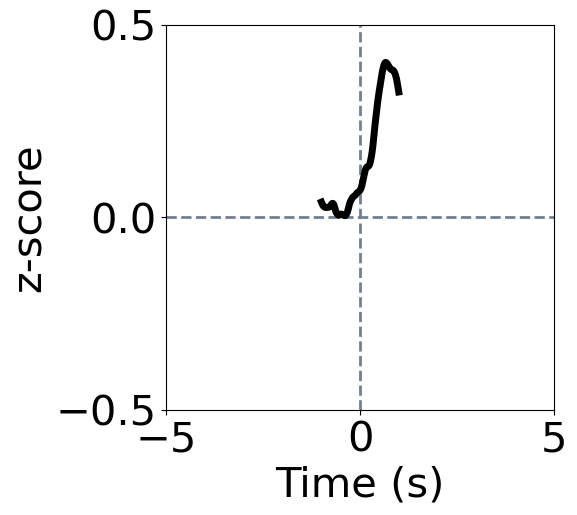

22. Plot behavior (movement to arrest)...


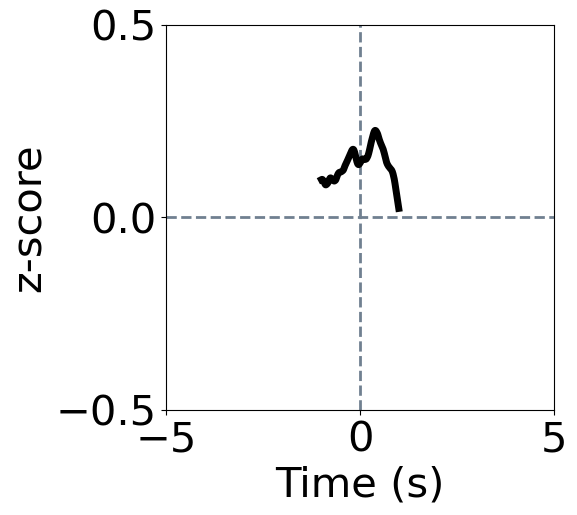

In [10]:
import numpy as np  # package for scientific computing, handles arrays and math
from operator import add
#Plot behavior, activity events

#User defined parameters
save=True
save_fig=True
post_window_size=5 #readjust plot xmax
#save=False
font_size = 30
plot_width = 5
plot_height = 5
xint = 5
ymax_4 = 40
ymin_5 = -0.5
ymax_5 = 0.5
j=1

temp_array = []
temp_transpose_array = []

behave_mean_all_marker_array = []
activity_mean_all_array = []
behave_std_all_marker_array = []
activity_std_all_array = []

behave_mean2_all_marker_array = []
activity_mean2_all_array = []
behave_std2_all_marker_array = []
activity_std2_all_array = []

#Arrest to Movement
#for i in range(len(behave_mean_marker1_array))

print("\033[1m"+"21. Plot behavior (arrest to movement)..."+"\033[0m")

analysis_window = [1.0,1.0]
temp_array=[[] for i in range(tpath)]
temp_transposed_array=[]
fig,ax6 = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
for i in range(len(activity_mean_array)):
    temp_array[i]=activity_mean_array[i][j][int((pre_window_size-analysis_window[0])*freq_470A):int((pre_window_size+analysis_window[1])*freq_470A)]
temp_transposed_array=np.transpose(temp_array)
for i in range(len(temp_transposed_array)):
    activity_mean_all_array.append(np.nanmean(temp_transposed_array[i]))
    activity_std_all_array.append(np.nanstd(temp_transposed_array[i]))    
reduced_time=np.array(activity_interval_time[0][int((pre_window_size-analysis_window[0])*freq_470A):int((pre_window_size+analysis_window[1])*freq_470A)])
reduced_time = reduced_time[::10]
reduced_activity = np.array(activity_mean_all_array)[::10]
reduced_activity_std = np.array(activity_std_all_array)[::10]
ax6.axvline(0, color='slategray', linestyle='--', linewidth=2)
ax6.axhline(0, color='slategray', linestyle='--', linewidth=2)
ax6.plot(reduced_time,reduced_activity, color='black', linewidth=5)
#ax6.fill_between(reduced_time, list(map(operator.add,reduced_activity,reduced_activity_std)), list(map(operator.sub,reduced_activity,reduced_activity_std)), facecolor='gray', alpha=0.2)
ax6.set_ylabel('z-score', fontsize=font_size)
ax6.set_xlabel('Time (s)', fontsize=font_size)
ax6.tick_params(axis="x", labelsize=font_size)
ax6.tick_params(axis="y", labelsize=font_size)
ax6.set_ylim(ymin_5,ymax_5)
ax6.set_xlim(-1*pre_window_size,post_window_size)
plt.yticks(np.arange(ymin_5, ymax_5+0.01, 0.5))
plt.xticks(np.arange(-1*pre_window_size, post_window_size+0.01, xint))
if save_fig:
    plt.savefig("20241220_init_template_"+str(analysis_window[0])[0]+'_'+str(analysis_window[0])[2]+'_'+str(analysis_window[1])[0]+'_'+str(analysis_window[1])[2]+".pdf",bbox_inches = 'tight',dpi=300)
plt.show()

if(save):
    np.save("20241220_init_template_"+str(analysis_window[0])[0]+'_'+str(analysis_window[0])[2]+'_'+str(analysis_window[1])[0]+'_'+str(analysis_window[1])[2]+".npy",activity_mean_all_array)
#endif

#Movement to Arrest
print("\033[1m"+"22. Plot behavior (movement to arrest)..."+"\033[0m")
analysis_window = [1.0,1.0]
temp_array=[[] for i in range(tpath)]
temp_transposed_array=[]
fig,ax9 = plt.subplots(nrows=1, ncols=1, figsize=(plot_width, plot_height))
for i in range(len(activity_mean2_array)):
    temp_array[i]=activity_mean2_array[i][j][int((pre_window_size-analysis_window[0])*freq_470A):int((pre_window_size+analysis_window[1])*freq_470A)]
temp_transposed_array=np.transpose(temp_array)
for i in range(len(temp_transposed_array)):
    activity_mean2_all_array.append(np.nanmean(temp_transposed_array[i]))
    activity_std2_all_array.append(np.nanstd(temp_transposed_array[i]))    
reduced_time=np.array(activity_interval_time[0])[int((pre_window_size-analysis_window[0])*freq_470A):int((pre_window_size+analysis_window[1])*freq_470A)]
reduced_time=reduced_time[::10]
reduced_activity = np.array(activity_mean2_all_array)[::10]
reduced_activity_std = np.array(activity_std2_all_array)[::10]
ax9.axvline(0, color='slategray', linestyle='--', linewidth=2)
ax9.axhline(0, color='slategray', linestyle='--', linewidth=2)
ax9.plot(reduced_time,reduced_activity, color='black', linewidth=5)
#ax9.fill_between(reduced_time, list(map(operator.add,reduced_activity,reduced_activity_std)), list(map(operator.sub,reduced_activity,reduced_activity_std)), facecolor='gray', alpha=0.2)
ax9.set_ylabel('z-score', fontsize=font_size)
ax9.set_xlabel('Time (s)', fontsize=font_size)
ax9.tick_params(axis="x", labelsize=font_size)
ax9.tick_params(axis="y", labelsize=font_size)
ax9.set_ylim(ymin_5,ymax_5)
ax9.set_xlim(-1*pre_window_size,post_window_size)
plt.yticks(np.arange(ymin_5, ymax_5+0.01, 0.5))
plt.xticks(np.arange(-1*pre_window_size, post_window_size+0.01, xint))
if save_fig:
    plt.savefig("20241220_arrest_template"+str(analysis_window[0])[0]+'_'+str(analysis_window[0])[2]+'_'+str(analysis_window[1])[0]+'_'+str(analysis_window[1])[2]+".pdf",bbox_inches = 'tight',dpi=300)
plt.show()

if(save):
    np.save("20241220_arrest_template_"+str(analysis_window[0])[0]+'_'+str(analysis_window[0])[2]+'_'+str(analysis_window[1])[0]+'_'+str(analysis_window[1])[2]+".npy",activity_mean2_all_array)
#endif

